In [1]:
import numpy as np
from scipy import interpolate
from scipy.integrate import quad
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [9, 7]
import warnings
warnings.simplefilter('ignore', np.RankWarning)

# Problem 1
1) From Taylor expansion, we get:
\begin{equation}
f(x+\delta) - f(x-\delta) = 2\delta f'(x) + f'''(x)\frac{\delta ^3}{3} + f^{(5)}(x)\frac{2\delta^5}{5!} + ... 
\end{equation}
\begin{equation}
f(x+2\delta) - f(x-2\delta) = 4\delta f'(x) + f'''(x)\frac{8\delta ^3}{3} + f^{(5)}(x)\frac{2*2^5\delta^5}{5!} + ... 
\end{equation} 


We want to cancel out the terms with $f'''$, so we can multiply (1) by 8, and subtract (2), then for $f'$ we get:


\begin{align}
 f'(x) = \frac{-f(x+2\delta)+8f(x+\delta)-8f(x-\delta)+f(x-2\delta)}{12\delta} - \frac{f^{(5)}\delta ^4}{30} + ...
\end{align}


The last term of the expression is the leading term of the truncation error.


So the operator for the derivative is $f'(x) = \frac{-f(x+2\delta)+8f(x+\delta)-8f(x-\delta)+f(x-2\delta)}{12\delta}$.


2) To estimate the optimal $\delta$, we try to balance out the truncation error and the roundoff error.
To take into account the roundoff error, we add $g_1 \varepsilon_m f(x)$ to (1) and $g_2 \varepsilon_m f(x)$ to (2). Then:


\begin{equation*}
err = e_t + e_r = \frac{|f(x)^{(5)}|\delta^4}{30} + \frac{g \varepsilon_m |f(x)|}{12 \delta}, \\
\end{equation*}
where $g$ is a combination of $g_1$ and $g_2$.
\begin{equation*}
0 = \frac{\partial}{\partial \delta}err = \frac{4|f(x)^{(5)}|\delta^3}{30} - \frac{g \varepsilon_m |f(x)|}{12 \delta^2} 
\end{equation*}
\begin{equation*}
\delta_{opt} = (\varepsilon_m |\frac{f(x)}{f^{(5)}(x)}|)^{1/5} 
\end{equation*}

epsilon = 2.220446049250313e-16
Estimated delta for d/dx exp(x) = 0.0007401 = 10^-3.13
exp  err
-10.0 1.41e-06
-9.0 8.06e-08
-8.0 2.14e-08
-7.0 1.17e-09
-6.0 1.63e-10
-5.0 1.79e-11
-4.0 1.23e-12
-3.0 4.40e-13
-2.0 9.06e-10
-1.0 9.07e-06
0.0 1.02e-01
1.0 1.10e+07

Estimated delta for d/dx exp(0.01x) = 0.0740096 = 10^-1.13
exp  err
-10.0 9.88e-07
-9.0 4.42e-08
-8.0 7.65e-09
-7.0 6.05e-11
-6.0 5.06e-11
-5.0 2.46e-12
-4.0 2.35e-13
-3.0 1.05e-13
-2.0 5.40e-15
-1.0 1.33e-15
0.0 3.37e-12
1.0 3.37e-08


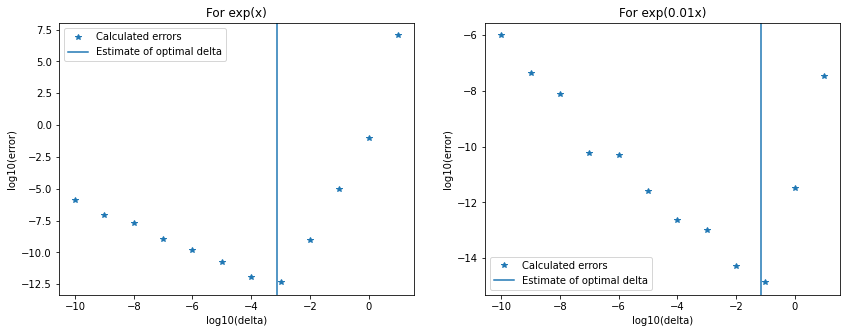

In [2]:
#define the numerical derivative
def deriv4(f, x, d):
    return (-f(x+2*d) + 8*f(x+d) - 8*f(x-d) + f(x-2*d))/(12*d)

a1 = 1
a2 = 0.01
def f1(x):  #exp(x)
    return np.exp(a1*x)
def f2(x):  #exp(0.01x)
    return np.exp(a2*x)

epsilon = np.finfo(np.float64).eps  #getting epsilon from numpy
print('epsilon =', epsilon) 
delta_expvals = np.linspace(-10,1,12)  #we will try different deltas and compare the performance
x = 1

delta_estimate1 = epsilon**0.2/a1 #for exp(a*x) the expression for delta_opt is simple and does not depend on x
print('Estimated delta for d/dx exp(x) = '+f"{delta_estimate1:.7f}"+' = 10^'+f"{np.log10(delta_estimate1):.2f}")
truth1 = a1*np.exp(a1*x) #using the analytical derivative
logerr1 = np.zeros(len(delta_expvals))
print('exp  err')
for i, expval in enumerate(delta_expvals):  #calculating the actual errors for different deltas
    d = 10**expval
    deriv = deriv4(f1, x, d)
    err = np.abs(deriv-truth1)
    print(expval, f"{err:.2e}")
    logerr1[i] = np.log10(err)
print('')  

# now do the same for exp(0.01x)
delta_estimate2 = epsilon**0.2/a2
truth2 = a2*np.exp(a2*x)
print('Estimated delta for d/dx exp(0.01x) = '+f"{delta_estimate2:.7f}"+' = 10^'+f"{np.log10(delta_estimate2):.2f}")
logerr2 = np.zeros(len(delta_expvals))
print('exp  err')  
for i, expval in enumerate(delta_expvals):
    d = 10**expval
    deriv = deriv4(f2, x, d)
    err = np.abs(deriv-truth2)
    print(expval, f"{err:.2e}") #print out log10(delta) and the error
    logerr2[i] = np.log10(err)

# plot the calculated error as function of delta in loglog; add a vertical line for our estimate of the optimal delta
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
ax1.plot(delta_expvals, logerr1, '*', label = 'Calculated errors')
ax1.axvline(x=np.log10(delta_estimate1), label = 'Estimate of optimal delta')
ax1.set(xlabel = ('log10(delta)'), ylabel = ('log10(error)'))
ax1.legend()
ax1.set_title('For exp(x)')
ax2.plot(delta_expvals, logerr2, '*', label = 'Calculated errors')
ax2.axvline(x=np.log10(delta_estimate2), label = 'Estimate of optimal delta')
ax2.set(xlabel = ('log10(delta)'), ylabel = ('log10(error)'))
ax2.legend()
ax2.set_title('For exp(0.01x)')
plt.show()

We conclude that the estimation of the optimal value for delta was quite accurate.

# Problem 2
The data includes not only temperature values at given points, but also the first derivatives. To use the information about the derivatives, Hermite spline interpolation method was chosen.


To estimate the error of the method, half of the data points were used as a sample to interpolate the values of the other half, and compare them to their real values.

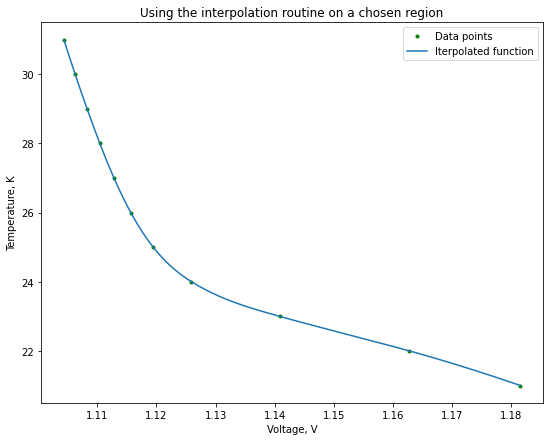

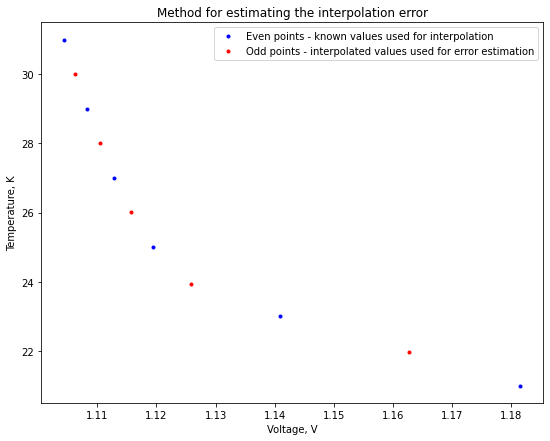

Estimated RMS error (calculated for the full data range, not only for the shown) = 0.01932 K


In [3]:
link = "https://raw.githubusercontent.com/sievers/phys512-2020/master/problem_sets/lakeshore.txt"
Ts, Vs, dmVdT = np.loadtxt(link, unpack=True)
Ts = Ts[np.argsort(Vs)]  #sort data so the x axis (Voltage) is in increasing order
dmVdT = dmVdT[np.argsort(Vs)]
Vs = np.sort(Vs)
ders = 1000/dmVdT  #convert the given derivatives into dT/dV (K/V)

# define Hermite polynomials
def h00(t):
    return 2*t**3 - 3*t*t + 1
def h10(t):
    return t**3 - 2*t*t + t
def h01(t):
    return -2*t**3 + 3*t*t
def h11(t):
    return t**3 - t*t

#the function that takes an arbitrary voltage and interpolates to return a temperature
#using Hermite splines
def spline_T(V, Vs, Ts, ders):  
    if V < Vs[0] or V >= Vs[-1]:
        print("error: The V value is out of the interpolation range")
    else:
        ind = np.max(np.where(Vs <= V))
        w = (V - Vs[ind])/(Vs[ind+1] - Vs[ind])
        dv = Vs[ind+1]-Vs[ind]
        return h00(w)*Ts[ind] + h10(w)*dv*ders[ind] + h01(w)*Ts[ind+1] + h11(w)*dv*ders[ind+1] 

#this function performs the interpolation for a number of different voltage values                
def interpolate_T(Vsnew, Vs, Ts, ders):  
    Tsnew = np.zeros(len(Vsnew))
    for i, V in enumerate(Vsnew):
        Tsnew[i] = spline_T(V, Vs, Ts, ders)
    return Tsnew

#demonstrate the performance of the interpolation routine on an interesting (nonlinear) region of the function T(V)
V_interp = np.linspace(Vs[68], Vs[78], 200)
T_interp = interpolate_T(V_interp, Vs, Ts, ders)
plt.plot(Vs[68:79], Ts[68:79], 'g.', label='Data points')  
plt.plot(V_interp, T_interp, label = 'Iterpolated function')
plt.legend()
plt.xlabel('Voltage, V'); plt.ylabel('Temperature, K')
plt.title('Using the interpolation routine on a chosen region')
plt.show()

#now estimate the error - use interpolation on the odd points, given the value of even points
T_estim = interpolate_T(Vs[1:-1:2], Vs[::2], Ts[::2], ders[::2])
err = np.std(T_estim - Ts[1:-1:2])
plt.clf()
plt.plot(Vs[68:79:2], Ts[68:79:2], 'b.', label = 'Even points - known values used for interpolation')
plt.plot(Vs[69:78:2], T_estim[34:39], 'r.', label = 'Odd points - interpolated values used for error estimation')
plt.legend()
plt.title('Method for estimating the interpolation error')
plt.xlabel('Voltage, V'); plt.ylabel('Temperature, K')
plt.show()
# print the calculated error
print("Estimated RMS error (calculated for the full data range, not only for the shown) = "+ f"{err:.5f}" + " K")



# Problem 3

For the Lorentzian, we expect to get the exact solution with the rational function interpolation, as the Lorentzian itself is a rational function. The coefficients should be p = [1, 0, 0, ...], q = [0, 1, 0, 0, ...].

We also expect the polynomial interpolation to perform better for cos(x), as this function is well represented by a Taylor series. We also know that the polynomial will perform the worst near the edges.

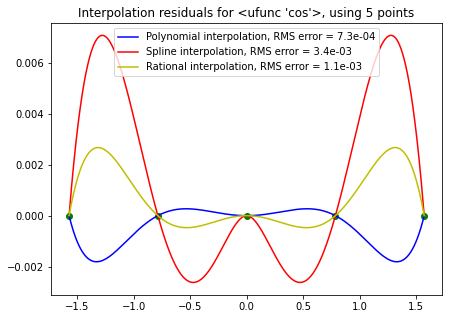

p = [ 1.00000000e+00  6.16297582e-33 -4.05284735e-01]
q = [8.88880783e-17 9.83385665e-02]


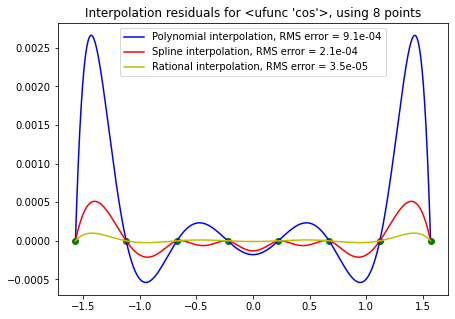

p = [ 9.99990995e-01  0.00000000e+00 -4.05281085e-01 -1.13686838e-13]
q = [2.27373675e-13 9.45089878e-02 0.00000000e+00 6.23367409e-03]


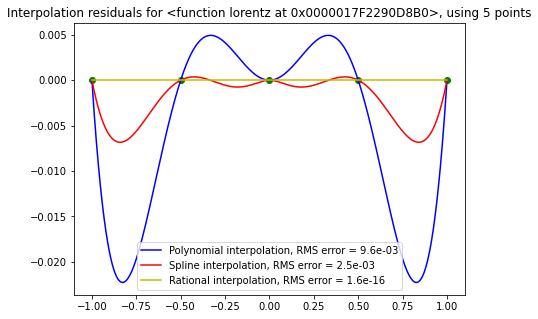

p = [ 1.00000000e+00 -3.33066907e-16  5.55111512e-16]
q = [-7.77156117e-16  1.00000000e+00]


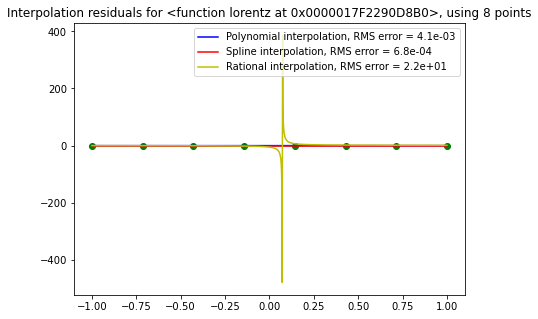

p = [ -4.29862069 -20.           2.           3.96729867]
q = [-14.   4.  -2.   0.]


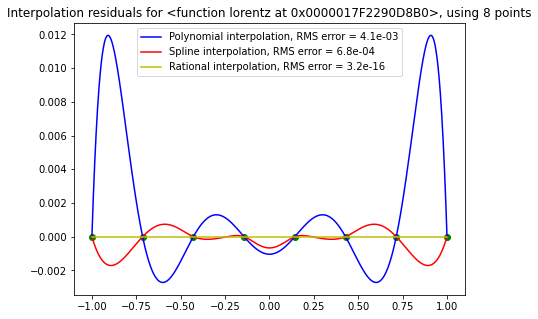

p = [ 1.00000000e+00  1.33226763e-15 -3.33333333e-01 -1.77635684e-15]
q = [ 1.77635684e-15  6.66666667e-01 -8.88178420e-16 -3.33333333e-01]


In [4]:
def lorentz(x):
    return 1.0/(1.0+x**2)

def rat_eval(p,q,x):   #evaluate a rational function with given parameters
    num = 0
    for i in range(len(p)):
        num = num +p[i]*x**i
    den =1
    for i in range(len(q)):
        den = den + q[i]*x**(i+1)
    return num/den
def rat_fit(x,y,n,m, usepinv = False): #interpolation using a rational function
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat = np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n] = -y*x**i
    if usepinv == True:
        pars = np.dot(np.linalg.pinv(mat),y) #compute the pseudo-inverse matrix 
    else:
        pars = np.dot(np.linalg.inv(mat),y) #compute the inverse matrix
    p = pars[:n]
    q = pars[n:]
  # print('Det =', np.linalg.det(mat))
    return p,q

#a routine that uses different interpolation methods on the same set of data points,
#calculates the errors for each of them and dispays plots 
def compare_interpolations(func, interval, n, m, usepinv = False):   
    xs = np.linspace(interval[0], interval[1], n+m-1)  
    ys = func(xs)  #generate data points 
    xx = np.linspace(xs[0],xs[-1], 1001)  #x values for the interpolation
    yy_true = func(xx)    
    # polynomial interpolation
    poly = np.polyfit(xs,ys,n+m-1)
    yy_poly = np.polyval(poly,xx)
    err_poly = np.std(yy_poly - yy_true)
    #cubic spline interpolation
    spln = interpolate.splrep(xs,ys)
    yy_spln = interpolate.splev(xx,spln)
    err_spln = np.std(yy_spln - yy_true)
    #rational function interpolation
    p,q = rat_fit(xs,ys,n,m, usepinv)
    yy_rat = rat_eval(p,q,xx)
    err_rat = np.std(yy_rat- yy_true)
    # plot all the residuals together and display the errors in the legend
    plt.figure(figsize = (7,5))
    plt.plot(xs,0*ys,'go')
    plt.plot(xx,yy_poly - yy_true, 'b', label = 'Polynomial interpolation, RMS error = ' + f"{err_poly:.1e}")
    plt.plot(xx,yy_spln - yy_true, 'r', label = 'Spline interpolation, RMS error = ' + f"{err_spln:.1e}")
    plt.plot(xx,yy_rat - yy_true, 'y', label = 'Rational interpolation, RMS error = ' + f"{err_rat:.1e}")
    plt.legend()
    plt.title('Interpolation residuals for '+str(func)+', using '+str(n+m-1)+' points')
    plt.show()
    print('p =', p) 
    print('q =', q)  #the coeffs of the rational function will be printed below the plot
    
        
compare_interpolations(np.cos,[-np.pi/2, np.pi/2], 3, 3)  # cos, n = 3, m = 3
compare_interpolations(np.cos,[-np.pi/2, np.pi/2], 4, 5)  # cos, n = 4, m = 5

compare_interpolations(lorentz,[-1, 1], 3, 3)  # lorentzian, n = 3, m = 3
compare_interpolations(lorentz,[-1, 1], 4, 5)  # lorentzian, n = 4, m = 5
compare_interpolations(lorentz,[-1, 1], 4, 5, usepinv = True) #lorentzian, same order, but now using pinv


As we can see, the solution for rational interpolation of the Lorenzian is exact  with m = n = 3, but not for n = 4, m = 5. For the higher order the matrix of the linear system is singular, so solving for the coefficients becomes problematic.

Indeed, the solution of the system is not unique for high orders, it only has to satisfy $\frac{1+\sum q_i x^{i+1}}{\sum p_i x^i} = 1 + x^2$.

We can get an accurate solution for a higher order using a matrix pseudo-inverse. In this case, for n = 4, m = 5, we have got:

\begin{equation}
\frac{\sum p_i x^i}{1+\sum q_i x^{i+1}} = \frac{1-1/3x^2}{1+2/3x^2-1/3x^4}=\frac{3-x^2}{(3-x^2)(1+x^2)}=\frac{1}{1+x^2}.
\end{equation}

# Problem 4

The electric field is given by:
\begin{align}
E_r = \frac{\sigma R^2}{2 \varepsilon_0} \int_{0}^{\pi} \frac{(z-R \cos\theta)\sin\theta d \theta}{(R^2 + z^2 - 2Rz\cos\theta)^{3/2}}
\end{align}


The integral has a singularity at R = z, $\theta$ = 0.
 
 
We choose the units so that R = 1 and $\sigma$ (surface charge density of the sphere, $\sigma = Q/4\pi R^2$) = 1.

z = R in zs: True


<ipython-input-5-10c01d1ca6fc>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.sin(theta)*(z - np.cos(theta))/2./(1 + z**2 - 2*z*np.cos(theta))**(3./2.)


integrate.quad(dE) at z = R gives [0.5]
my_integrator(dE) at z = R gives [nan]


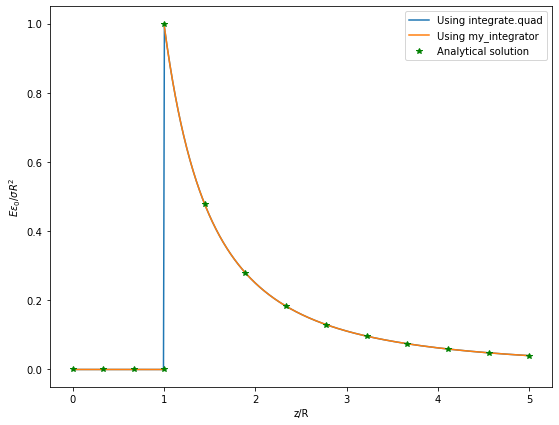

In [5]:
def dE(theta, z): 
    return np.sin(theta)*(z - np.cos(theta))/2./(1 + z**2 - 2*z*np.cos(theta))**(3./2.)

def my_integrator(func, a, b, npts, args = ()):   #using Simpson's integration rule
    x = np.linspace(a,b,npts)
    y = func(x, args)
    dx = np.median(np.diff(x))
    return dx/3.0*(y[0] + 4*np.sum(y[1::2]) + 2*np.sum(y[2:-1:2])+ y[-1])

zs = np.linspace(0., 5., 1001)
print('z = R in zs:',1. in zs)  #make sure that one of the points is z = 1 (R)
Equad = np.zeros(len(zs))
Emyint = np.zeros(len(zs))

for i, z in enumerate(zs):
    F, err = quad(dE, 0, np.pi, args = z)
    Equad[i] = F
    Emyint[i] = my_integrator(dE, 0, np.pi,3000,args = z)

#check what happens at z = 1 (R)
print('integrate.quad(dE) at z = R gives '+str(Equad[zs == 1.]))  
print('my_integrator(dE) at z = R gives '+str(Emyint[zs == 1.]))

zinside = np.linspace(0., 1., 4)
zoutside = np.linspace(1.,5., 10)
plt.plot(zs, Equad, label = 'Using integrate.quad')
plt.plot(zs, Emyint, label = 'Using my_integrator')
plt.plot(zinside, 0*zinside, 'g*')
plt.plot(zoutside, 1/zoutside**2, 'g*', label = 'Analytical solution')
plt.xlabel('z/R')
plt.ylabel('$E \epsilon_0/\sigma R^2}$')
plt.legend()
plt.show()

As we can see, my_integrator fails to evaluate the integral with z = R, while integrate.quad successfully overcomes the problem. For other values of z, the results of both methods are in good accordance with the analytical solution.